In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the sigmoid activation function and its derivative and prediction function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def prediction(pred, w, b):
    return sigmoid(np.dot(pred, w) + b)

# Inputs (x1, x2) and targets (y1, y2)
inputs = np.array([[0.05], [0.10]])
inputs.shape
targets = np.array([[0.01], [0.99]])
targets.shape

# Learning rates
learning_rates = [0.05, 0.5, 1.0]

# Parameters
iterations = 3000000
round_about = 5

# Observations for each learning rate
observations = {}

# Loop for each learning rate
for eta in learning_rates:
    # Initialize weights and biases
    np.random.seed(42)  # Set a random seed for reproducibility
    weights = np.random.rand(1, 1)
    bias = np.random.rand(1, 1)
    
    # Track the weight and bias updates
    weights_history = []
    bias_history = []
    mse_history = []
    
    for i in range(iterations):
        # Forward Pass
        weights_sum = np.dot(inputs, weights) + bias
        first_output = sigmoid(weights_sum)
        
        # Error Calculation
        error = first_output - targets
        mse = np.mean(error**2)
        
        # Calculate gradients for the output layer
        d_output = error * sigmoid_derivative(first_output)
        final_derivative = np.dot(inputs.T, d_output)
        
        # Update weights and biases
        weights -= final_derivative * eta
        bias -= np.sum(d_output, axis=0, keepdims=True) * eta
        
        # Store updates
        weights_history.append(weights.copy())
        bias_history.append(bias.copy())
        mse_history.append(mse.copy())
        
    
    # Store history for each learning rate
    observations[eta] = {
        "weights_history": weights_history,
        "bias_history": bias_history,
        "mse_history": mse_history
    }

# Extracting the last item for each history for each learning rate
last_items = {
    eta: {
        'last_weights': round(history['weights_history'][-1][0][0], round_about),
        'last_bias': round(history['bias_history'][-1][0][0], round_about),
        'last_MSE': round(history['mse_history'][-1], round_about),
        'prediction for "0.05"': round(prediction(np.array([0.05]), 
                                            history['weights_history'][-1], 
                                            history['bias_history'][-1])[0][0], round_about),
        'prediction for "0.1"': round(prediction(np.array([0.1]), 
                                            history['weights_history'][-1], 
                                            history['bias_history'][-1])[0][0], round_about),
    }
    for eta, history in observations.items()
}

results_df = pd.DataFrame(last_items)
results_df


,0.05,0.50,1.00
last_weights,108.87177,153.88135,164.62562
last_bias,-8.16445,-11.54044,-12.34640
last_MSE,0.00267,0.00012,0.00004
"prediction for ""0.05""",0.06175,0.02091,0.01606
"prediction for ""0.1""",0.93835,0.97912,0.98395


In [3]:
# Extracting the record item that is first 10 data for each history for each learning rate
record_items = {
    f'{eta}': pd.DataFrame({
        'weights_history': [round(item[0][0], round_about) for item in history['weights_history'][:10]],
        'bias_history': [round(item[0][0], round_about) for item in history['bias_history'][:10]],
        'mse_history': [round(item, round_about) for item in history['mse_history'][:10]]
    })
    for eta, history in observations.items()
}

record_items


{'0.05':    weights_history  bias_history  mse_history
 0          0.37444       0.94617      0.28975
 1          0.37435       0.94163      0.28934
 2          0.37425       0.93711      0.28893
 3          0.37415       0.93259      0.28852
 4          0.37406       0.92808      0.28811
 5          0.37397       0.92358      0.28770
 6          0.37388       0.91909      0.28730
 7          0.37379       0.91461      0.28689
 8          0.37370       0.91013      0.28649
 9          0.37361       0.90567      0.28609,
 '0.5':    weights_history  bias_history  mse_history
 0          0.37356       0.90526      0.28975
 1          0.37270       0.86075      0.28566
 2          0.37196       0.81728      0.28174
 3          0.37135       0.77496      0.27801
 4          0.37088       0.73387      0.27448
 5          0.37055       0.69409      0.27115
 6          0.37036       0.65567      0.26804
 7          0.37030       0.61866      0.26514
 8          0.37039       0.58311      0.262

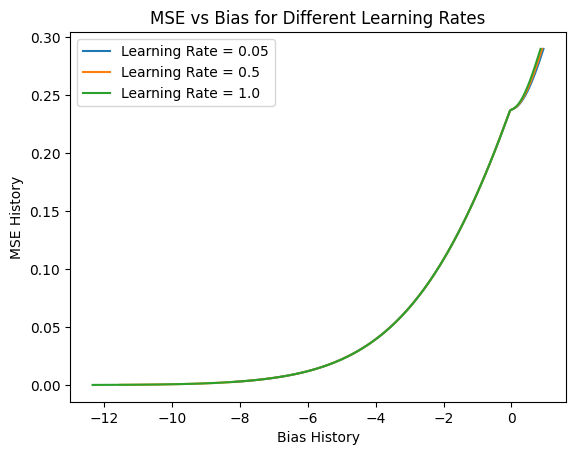

In [4]:

# Plotting MSE vs. Bias for each learning rate
for eta, history in observations.items():
    bias_history = [item if isinstance(item, float) else item[0] for item in history["bias_history"]]
    mse_history = [item if isinstance(item, float) else item[0] for item in history["mse_history"]]
    plt.plot(bias_history, mse_history, label=f'Learning Rate = {eta}')

# Configuring the plot
plt.xlabel('Bias History')
plt.ylabel('MSE History')
plt.title('MSE vs Bias for Different Learning Rates')
plt.legend()
plt.show()

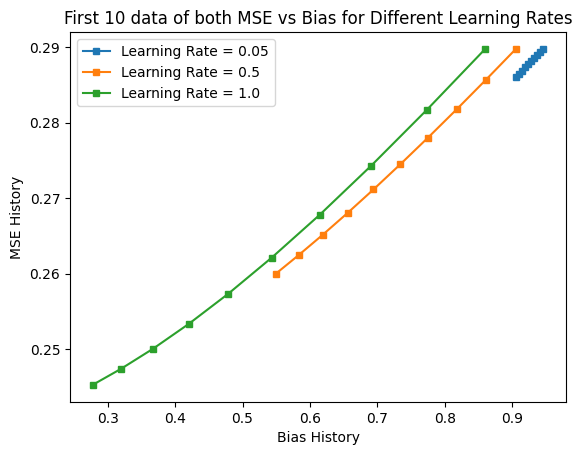

In [5]:
# Plotting MSE vs. Bias for each learning rate with 10 data
for eta, history in record_items.items():
    bias_history = [item if isinstance(item, float) else item[0] for item in history["bias_history"]]
    mse_history = [item if isinstance(item, float) else item[0] for item in history["mse_history"]]
    plt.plot(bias_history, mse_history, label=f'Learning Rate = {eta}', marker='s', markersize=5)

# Configuring the plot
plt.xlabel('Bias History')
plt.ylabel('MSE History')
plt.title('First 10 data of both MSE vs Bias for Different Learning Rates')
plt.legend()
plt.show()